# Cognitive Intelligence and Knowledge Based Classification and Reasoning

#### Importing Libraries, basic visualisation and preprocessing

In [55]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes

In [56]:
#variables
num_clusters = 3
url="https://raw.githubusercontent.com/saurabhk7/Cognitive-Classification-and-Reasoning/master/Feb25_students.csv"

In [57]:
#read data from url into a dataframe
df = pd.read_csv(url)

In [58]:
# Columns and their types
df.dtypes
df.loc[-1] = ['2/14/2019 13:39:07','admin','Pune Institute of Computer Technology','Computer Engineering','Fourth Year',9.99,'Average','Not Participated','No','No','No','No','No','No','No',"Job in technical domain (Software Developer, Data Scientist etc.)",'No','No','No - I do NOT ask questions or I prefer to look at the topic on my own','I leave the topic to look at it later on.','I leave the topic and look at during examinations','I learn a topic only to score marks in college/university examination','Short term memorization of syllabus just to spend lesser time','When exams are around the corner by just focusing on the given syllabus','I study topics that are limited to the examination curriculum irrespective of my understanding of the topic','No','No','Yes','Memorize the topic and its contents OR Leave it','Yes','is Apt or Overestimates my knowledge','is Apt or Overestimates my efforts','Delay the project and postpone it to some other time','No/Average performance','No','No','No','No','Do not prefer','Do not prefer','Do not prefer']
df.sort_index(inplace=True)
df.index = df.index + 1  # shifting index
# df

In [59]:
mapping_df=pd.read_csv("mapping.csv")
for feature_name in mapping_df.columns:
    if feature_name=='S No':
        continue
    max_value = mapping_df[feature_name].max()
    min_value = mapping_df[feature_name].min()
    mapping_df[feature_name] = (mapping_df[feature_name] - min_value) / (max_value - min_value)
mapping_df = mapping_df.drop(["S No"], axis=1)
print(mapping_df)

    Aptitude and Logic (A1)  Independent Studies (A2)  Interest (A3)  \
0                       0.0                  0.857143       0.888889   
1                       0.6                  0.000000       0.000000   
2                       0.4                  0.000000       0.000000   
3                       0.4                  0.000000       0.000000   
4                       1.0                  0.714286       0.444444   
5                       0.0                  0.285714       0.555556   
6                       0.3                  0.714286       0.444444   
7                       0.6                  0.142857       0.000000   
8                       0.0                  0.000000       0.000000   
9                       0.0                  0.000000       0.000000   
10                      0.0                  0.000000       0.000000   
11                      0.0                  0.142857       1.000000   
12                      0.0                  0.000000       0.00

In [60]:
w, h = 36, 9
weights = [[0 for x in range(w)] for y in range(h)]
for ind, column in enumerate(mapping_df.columns):
    weights[ind] = mapping_df[column]
print(weights)
#each row is an attribute, and each column is a question its mapped to, eg: weights[0][11] is value of aptitude of question 12 (0-based indexing)

[0     0.0
1     0.6
2     0.4
3     0.4
4     1.0
5     0.0
6     0.3
7     0.6
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.2
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.1
30    0.1
31    0.1
32    0.1
33    0.0
34    0.0
35    0.0
Name: Aptitude and Logic (A1), dtype: float64, 0     0.857143
1     0.000000
2     0.000000
3     0.000000
4     0.714286
5     0.285714
6     0.714286
7     0.142857
8     0.000000
9     0.000000
10    0.000000
11    0.142857
12    0.000000
13    0.000000
14    0.428571
15    0.428571
16    0.000000
17    0.142857
18    0.571429
19    0.000000
20    0.285714
21    0.000000
22    0.000000
23    0.428571
24    0.000000
25    0.142857
26    0.142857
27    0.714286
28    0.571429
29    0.142857
30    0.142857
31    0.142857
32    0.428571
33    1.000000
34    0.857143
35    0.000000
Name: Independent Studies (A2), dtype: float64, 0   

In [61]:
#Data preprocessing
df.drop_duplicates(subset ="Email Address", keep = 'last', inplace = True) 
df = df.loc[df['College Name?'] == 'Pune Institute of Computer Technology']

#dfemail: retains the email id for future mapping
dfemail = df.copy()

df = df.drop(['Timestamp','Email Address','Current Branch?', 'Current Year?'], axis = 1)
df = df.drop(['College Name?'], axis = 1)

In [62]:
# Displays descriptive stats for all columns
df.describe()

,What is your Grade in College (GPA)?
count,353.000000
mean,8.709354
std,0.938970
min,0.000000
25%,8.330000
50%,8.900000
75%,9.220000
max,9.990000


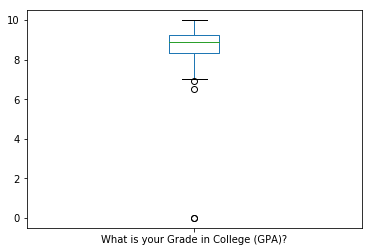

In [63]:
df.plot(kind='box')

In [64]:
df.dtypes

What is your Grade in College (GPA)?                                                                                                               float64
How would you rate your puzzle solving efficiency?                                                                                                  object
Have you prepared for any olympiads/national level competitive examinations in your school days?                                                    object
Have you actively participated in activities like chess or abacus etc?                                                                              object
Have you been "extensively" involved in the following? [Competitive Coding]                                                                         object
Have you been "extensively" involved in the following? [Sodtware Development]                                                                       object
Have you been "extensively" involved in the following? [ML/AI Projects

In [65]:
df.head()

,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,9.99,Average,Not Participated,No,No,No,No,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,9.40,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,9.37,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,9.20,Average,Participated and Prepared,No,No,No,Yes,No,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,9.32,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer


In [66]:
# dataframe to store only categorical attributes
dfcat = df.loc[:, df.columns != 'What is your Grade in College (GPA)?']

In [67]:
# Categorical boolean mask
categorical_feature_mask = dfcat.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = dfcat.columns[categorical_feature_mask].tolist()

In [68]:
# instantiate labelencoder object
le = LabelEncoder()

In [69]:
#Display categorical columns in dataframe
dfcat[categorical_cols]

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,No,No,No,No,Do not prefer,Do not prefer,Do not prefer
1,High,Not Participated,No,Yes,Yes,No,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,Average,Participated and Prepared,No,No,Yes,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,Average,Participated and Prepared,No,No,No,Yes,No,No,No,"Masters in foreign country (US, Canada etc.)",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,Average,Participated and Prepared,No,Yes,Yes,No,Yes,Yes,No,"Masters in foreign country (US, Canada etc.)",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,High,Not Participated,No,Yes,No,No,Yes,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
6,Average,Not Participated,No,No,No,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,No,Prefer,Prefer,Do not prefer
7,Average,Not Participated,No,No,Yes,No,No,No,Yes,"Job in technical domain (Software Developer, D...",...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Do not prefer,Do not prefer
8,Average,Not Participated,No,No,Yes,No,No,No,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer
9,Average,Participated and Prepared,Yes,No,Yes,Yes,Yes,Yes,No,"Job in technical domain (Software Developer, D...",...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,Yes,Yes,Prefer,Prefer,Prefer


In [70]:
# apply le on categorical feature columns
dfcat[categorical_cols] = dfcat[categorical_cols].apply(lambda col: le.fit_transform(col))

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [71]:
#Display encoded Categorical values in dataframe
dfcat[categorical_cols].head()

,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",What are your plans after your undergraduation?,...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,1,1,0,1,...,0,0,1,1,1,0,0,1,1,1
2,0,1,0,0,1,1,0,0,0,4,...,0,1,1,1,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,4,...,0,0,1,1,0,1,0,1,1,1
4,0,1,0,1,1,0,1,1,0,4,...,1,1,1,1,1,0,1,1,1,1


In [72]:
#Add a gpa column in categorical dataframe and convert to a categorical bin
dfcat.insert(loc=0, column='GPA', value=df['What is your Grade in College (GPA)?'])
bin = [-1,0,7,7.5,8,8.25,8.5,8.75,9,9.25,9.5,10]
category = pd.cut(dfcat['GPA'],bin)
dfcat.insert(loc=0, column='Binned GPA', value=category)

In [73]:
dfcat.head(14)

,Binned GPA,GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
0,"(9.5, 10.0]",9.99,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(9.25, 9.5]",9.40,1,0,0,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
2,"(9.25, 9.5]",9.37,0,1,0,0,1,1,0,0,...,0,1,1,1,0,1,0,0,1,1
3,"(9.0, 9.25]",9.20,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,1,1
4,"(9.25, 9.5]",9.32,0,1,0,1,1,0,1,1,...,1,1,1,1,1,0,1,1,1,1
5,"(7.5, 8.0]",8.00,1,0,0,1,0,0,1,0,...,1,0,0,1,1,1,0,1,1,0
6,"(7.5, 8.0]",7.60,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
7,"(8.75, 9.0]",9.00,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
8,"(8.75, 9.0]",8.79,0,0,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
9,"(8.25, 8.5]",8.40,0,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [74]:
dfcat['Binned GPA'] = dfcat['Binned GPA'].astype('str') 
dfcat['Binned GPA'] = dfcat['Binned GPA'].map({'(-1.0, 0.0]': 0,'(0.0, 7.0]': 0, '(7.0, 7.5]': 1, '(7.5, 8.0]': 2, '(8.0, 8.25]': 3, '(8.25, 8.5]': 4, '(8.5, 8.75]': 5, '(8.75, 9.0]': 6, '(9.0, 9.25]': 7, '(9.25, 9.5]': 8, '(9.5, 10.0]': 9})
dfcat = dfcat.drop(['GPA'], axis = 1)
dfcat.isnull().values.any()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False

### Apply kmodes on the preprocessed data

In [75]:
df_dummy = pd.get_dummies(dfcat)
df_dummy = df_dummy.iloc[1:,:]
dfemail = dfemail.iloc[1:,:]

In [77]:
dfemail.head()

,Timestamp,Email Address,College Name?,Current Branch?,Current Year?,What is your Grade in College (GPA)?,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]",...,How well do you think your GPA justifies the amount of efforts you put in?,"If you had an idea for a technical project, would you:","If you had an exam tomorrow, of a subject not of your interest, would you study hard to maintain a good score?",Are you proficient in the following? [Object Oriented Programming Concepts],Are you proficient in the following? [C/C++],Are you proficient in the following? [JAVA],Are you proficient in the following? [Python],Provide your preference for the following methods of learning [Books/Textual info on the Internet],Provide your preference for the following methods of learning [Online courses/videos],Provide your preference for the following methods of learning [Personalised classroom teaching (human)]
1,2/14/2019 13:39:07,abizerL123@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.40,High,Not Participated,No,Yes,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,Yes,No,No,Prefer,Prefer,Prefer
2,2/14/2019 13:42:31,saurabhkshirsagar35@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.37,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Start to learn and implement making the project,Yes,Yes,No,Yes,No,Do not prefer,Prefer,Prefer
3,2/14/2019 13:43:08,mahak.bansal97@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.20,Average,Participated and Prepared,No,No,...,is Apt or Overestimates my efforts,Delay the project and postpone it to some othe...,Yes,Yes,No,Yes,No,Prefer,Prefer,Prefer
4,2/14/2019 13:53:48,tjs.srivastava@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,9.32,Average,Participated and Prepared,No,Yes,...,it Underestimates my efforts,Start to learn and implement making the project,Yes,Yes,Yes,No,Yes,Prefer,Prefer,Prefer
5,2/14/2019 13:55:50,shreyashnadal@gmail.com,Pune Institute of Computer Technology,Computer Engineering,Fourth Year,8.00,High,Not Participated,No,Yes,...,it Underestimates my efforts,Delay the project and postpone it to some othe...,No/Average performance,Yes,Yes,Yes,No,Prefer,Prefer,Do not prefer


In [78]:
#dissimilaty matrix for weighted attributes calculation
attribute_index = 0
def ss_attribute(a, b, **_):
    cost = []
#     print("Working on attr: ",attribute_index)
    for i in range(0,len(a)):
        row_cost = 0
        for j in range(0,len(a[i])):
            if(a[i][j]!=b[j]):
                row_cost+=abs(a[i][j]-b[j])*weights[attribute_index][j]
        cost.append(row_cost)
        
    return np.array(cost)

/home/abizer/.local/lib/python3.5/site-packages/kmodes/util/__init__.py:70: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.vstack({tuple(row) for row in a})


Attribute:  0  Clusters:  1  n_init:  10  Best cost:  448.2999999999999
Attribute:  0  Clusters:  2  n_init:  10  Best cost:  323.30000000000007
Attribute:  0  Clusters:  3  n_init:  10  Best cost:  275.99999999999994
Attribute:  0  Clusters:  4  n_init:  10  Best cost:  240.49999999999966
Attribute:  0  Clusters:  5  n_init:  10  Best cost:  208.19999999999973
Attribute:  0  Clusters:  6  n_init:  10  Best cost:  184.99999999999997
Attribute:  0  Clusters:  7  n_init:  10  Best cost:  174.3999999999999


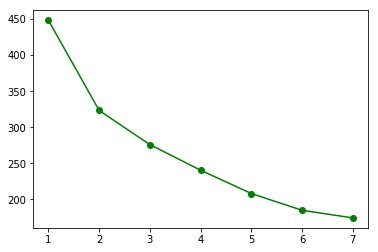

Attribute:  1  Clusters:  1  n_init:  10  Best cost:  1416.4285714285725
Attribute:  1  Clusters:  2  n_init:  10  Best cost:  1188.428571428572
Attribute:  1  Clusters:  3  n_init:  10  Best cost:  1039.9999999999998
Attribute:  1  Clusters:  4  n_init:  10  Best cost:  949.8571428571429
Attribute:  1  Clusters:  5  n_init:  10  Best cost:  911.2857142857146
Attribute:  1  Clusters:  6  n_init:  10  Best cost:  854.5714285714287
Attribute:  1  Clusters:  7  n_init:  10  Best cost:  814.0000000000001


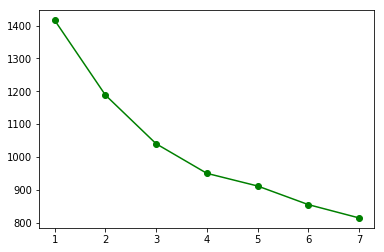

Attribute:  2  Clusters:  1  n_init:  10  Best cost:  2027.6666666666665
Attribute:  2  Clusters:  2  n_init:  10  Best cost:  1665.6666666666672
Attribute:  2  Clusters:  3  n_init:  10  Best cost:  1494.2222222222235
Attribute:  2  Clusters:  4  n_init:  10  Best cost:  1371.7777777777767
Attribute:  2  Clusters:  5  n_init:  10  Best cost:  1294.0
Attribute:  2  Clusters:  6  n_init:  10  Best cost:  1267.0000000000002
Attribute:  2  Clusters:  7  n_init:  10  Best cost:  1193.2222222222233


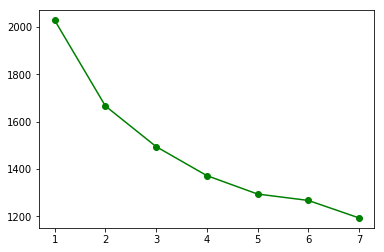

Attribute:  3  Clusters:  1  n_init:  10  Best cost:  1631.6000000000001
Attribute:  3  Clusters:  2  n_init:  10  Best cost:  1274.6000000000001
Attribute:  3  Clusters:  3  n_init:  10  Best cost:  1106.1999999999998
Attribute:  3  Clusters:  4  n_init:  10  Best cost:  987.3000000000003
Attribute:  3  Clusters:  5  n_init:  10  Best cost:  944.1000000000008
Attribute:  3  Clusters:  6  n_init:  10  Best cost:  878.0000000000005
Attribute:  3  Clusters:  7  n_init:  10  Best cost:  870.9000000000003


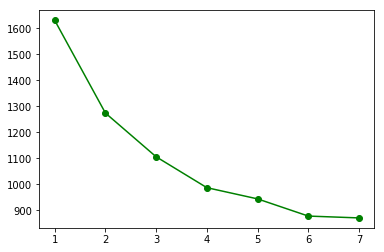

Attribute:  4  Clusters:  1  n_init:  10  Best cost:  851.3999999999996
Attribute:  4  Clusters:  2  n_init:  10  Best cost:  707.7999999999994
Attribute:  4  Clusters:  3  n_init:  10  Best cost:  605.9000000000004
Attribute:  4  Clusters:  4  n_init:  10  Best cost:  543.1999999999996
Attribute:  4  Clusters:  5  n_init:  10  Best cost:  510.20000000000005
Attribute:  4  Clusters:  6  n_init:  10  Best cost:  497.5999999999999
Attribute:  4  Clusters:  7  n_init:  10  Best cost:  451.1999999999996


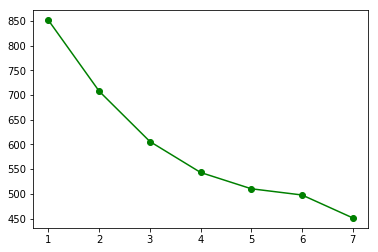

Attribute:  5  Clusters:  1  n_init:  10  Best cost:  1677.0909090909092
Attribute:  5  Clusters:  2  n_init:  10  Best cost:  1345.0909090909086
Attribute:  5  Clusters:  3  n_init:  10  Best cost:  1182.2727272727273
Attribute:  5  Clusters:  4  n_init:  10  Best cost:  1093.636363636364
Attribute:  5  Clusters:  5  n_init:  10  Best cost:  1022.272727272727
Attribute:  5  Clusters:  6  n_init:  10  Best cost:  974.0909090909091
Attribute:  5  Clusters:  7  n_init:  10  Best cost:  958.1818181818186


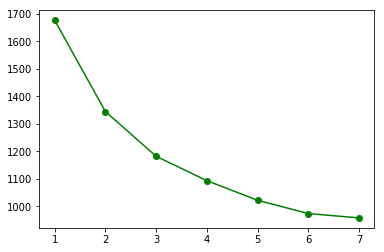

Attribute:  6  Clusters:  1  n_init:  10  Best cost:  1430.454545454546
Attribute:  6  Clusters:  2  n_init:  10  Best cost:  1164.7272727272732
Attribute:  6  Clusters:  3  n_init:  10  Best cost:  992.9090909090913
Attribute:  6  Clusters:  4  n_init:  10  Best cost:  889.2727272727277
Attribute:  6  Clusters:  5  n_init:  10  Best cost:  833.0909090909095
Attribute:  6  Clusters:  6  n_init:  10  Best cost:  794.0909090909089
Attribute:  6  Clusters:  7  n_init:  10  Best cost:  743.3636363636368


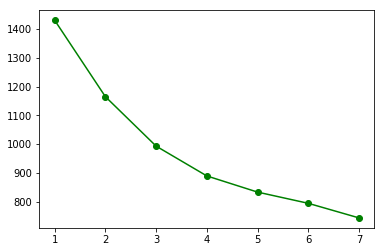

Attribute:  7  Clusters:  1  n_init:  10  Best cost:  1096.5555555555552
Attribute:  7  Clusters:  2  n_init:  10  Best cost:  830.1111111111109
Attribute:  7  Clusters:  3  n_init:  10  Best cost:  667.3333333333334
Attribute:  7  Clusters:  4  n_init:  10  Best cost:  573.1111111111107
Attribute:  7  Clusters:  5  n_init:  10  Best cost:  504.00000000000017
Attribute:  7  Clusters:  6  n_init:  10  Best cost:  503.00000000000006
Attribute:  7  Clusters:  7  n_init:  10  Best cost:  448.4444444444443


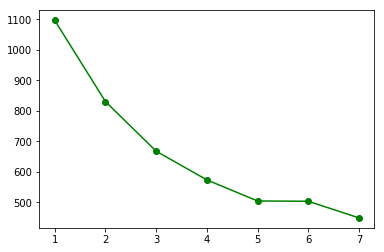

Attribute:  8  Clusters:  1  n_init:  10  Best cost:  798.4000000000005
Attribute:  8  Clusters:  2  n_init:  10  Best cost:  613.9999999999998
Attribute:  8  Clusters:  3  n_init:  10  Best cost:  528.9999999999999
Attribute:  8  Clusters:  4  n_init:  10  Best cost:  483.2
Attribute:  8  Clusters:  5  n_init:  10  Best cost:  454.4000000000001
Attribute:  8  Clusters:  6  n_init:  10  Best cost:  426.69999999999993
Attribute:  8  Clusters:  7  n_init:  10  Best cost:  396.2999999999998


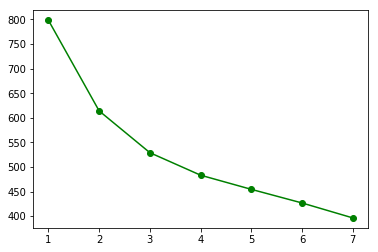

In [79]:
run_elbow = 1

if(run_elbow):
    
    num_init=20
    km = []
    clusters = []
    num_attribute_clusters = 3
    for i in range(0,len(weights)):
        xx=[]
        yy=[]
        for j in range(1,8):            
            attribute_index = i
            kmtemp = KModes(n_clusters=j, init='Huang', n_init=10, verbose=0, cat_dissim=ss_attribute)
            clusterstemp = kmtemp.fit_predict(df_dummy)
            print("Attribute: ",i," Clusters: ",j," n_init: ",10," Best cost: ",kmtemp.cost_)
            xx.append(j)
            yy.append(kmtemp.cost_)
        plt.plot(xx,yy,'go-',label='Cluster vs Cost')
        plt.show()
else:
    km = []
    clusters = []
    num_attribute_clusters = 3
    for i in range(0,len(weights)):
        attribute_index = i
        km.append(KModes(n_clusters=num_attribute_clusters, init='Huang', n_init=10, verbose=0, cat_dissim=ss_attribute))
        clusters.append(km[i].fit_predict(df_dummy))
        print("Attribute: ",i," Clusters: ",num_attribute_clusters," n_init: ",10," Best cost: ",km[i].cost_)
    for i in range(0,len(clusters)):
        cluster_name = 'cluster'+str(i)
        df_dummy[cluster_name] = clusters[i]

In [31]:
df_dummy.head()

,Binned GPA,How would you rate your puzzle solving efficiency?,Have you prepared for any olympiads/national level competitive examinations in your school days?,Have you actively participated in activities like chess or abacus etc?,"Have you been ""extensively"" involved in the following? [Competitive Coding]","Have you been ""extensively"" involved in the following? [Sodtware Development]","Have you been ""extensively"" involved in the following? [ML/AI Projects or Research]","Have you been ""extensively"" involved in the following? [Mathematics and Logical Reasoning]","Have you been ""extensively"" involved in the following? [Social Activities (College Fest Organization or similar managerial or club activities)]","Have you been ""extensively"" involved in the following? [Literature/Blogging ]",...,Provide your preference for the following methods of learning [Personalised classroom teaching (human)],cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8
1,8,1,0,0,1,1,0,1,1,0,...,1,0,2,1,1,0,0,2,0,0
2,8,0,1,0,0,1,1,0,0,0,...,1,2,2,1,1,0,0,2,0,1
3,7,0,1,0,0,0,1,0,0,0,...,1,2,2,1,1,0,2,0,0,0
4,8,0,1,0,1,1,0,1,1,0,...,1,1,2,1,1,0,0,2,0,1
5,2,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,1,2,0


In [32]:
# #dissimilaty matrix calculation
# def ss(a, b, **_):
#     cost = []
#     for i in range(0,len(a)):
#         row_cost = 0
#         for j in range(0,len(a[i])):
#             if(a[i][j]!=b[j]):
#                 row_cost+=abs(a[i][j]-b[j])
#         cost.append(row_cost)
        
#     return np.array(cost)

#### Algorithm for finding the appropriate number of clusters

In [33]:
# run_elbow = 0

# if(run_elbow):
#     xx=[]
#     yy=[]
#     num_init=20
#     for i in range(1,11):
#         km = KModes(n_clusters=i, init='Huang', n_init=num_init, verbose=0, cat_dissim=ss)
#         clusters = km.fit_predict(df_dummy)
#         print("Clusters: ",i," n_init: ",num_init," Best cost: ",km.cost_)
#         xx.append(i)
#         yy.append(km.cost_)
#     plt.plot(xx,yy,'go-',label='Cluster vs Cost')
#     plt.show()
# else:
#     km = KModes(n_clusters=num_clusters, init='Huang', n_init=40, verbose=0, cat_dissim=ss)
#     clusters = km.fit_predict(df_dummy)
#     print("Clusters: ",num_clusters," n_init: ",40," Best cost: ",km.cost_)
#     df_dummy['clusters'] = clusters

In [34]:
# # Display results of kmodes
def display_emails(i):
    kmodes_labels = km[i].labels_
    print (kmodes_labels)


    arr=[]
    for i in range(0,num_clusters):
        arr.append([])
    for i in range(0, len(kmodes_labels)):
        arr[kmodes_labels[i]].append((dfemail.iloc[i])["Email Address"])
    for i in range(0,num_clusters):
        print("Cluster ",i," :",arr[i])
        print()

In [35]:
def display_plots(i):
    # # Principal Component Analysis for dimentionality reduction
    pca = PCA(2)
    cluster_name = 'cluster'+str(i)
    # Turn the dummified df into two columns with PCA
    plot_columns = pca.fit_transform(df_dummy.iloc[:,:-9])

    # Plot based on the two dimensions, and shade by cluster label
    plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy[cluster_name])
    plt.title(cluster_name)
    plt.show()


In [36]:
if(run_elbow==0):
    for i in range(0,9):
        display_emails(i)   

[0 2 2 1 0 2 2 2 1 0 0 1 0 0 1 0 1 0 1 1 1 2 1 1 2 1 1 2 1 0 2 1 0 1 2 1 1
 1 1 2 1 1 2 1 0 1 1 1 0 1 0 0 1 0 0 1 2 1 0 0 1 1 0 0 1 1 1 0 2 2 1 1 1 0
 2 1 1 2 1 1 1 2 1 2 0 1 1 0 1 1 1 2 0 1 1 1 1 2 0 2 1 2 2 1 1 0 1 0 0 0 0
 2 1 2 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 2 1 0 2 1 1 2 2 1 0 1 2 1 1 0 1 0
 1 2 0 1 1 0 0 0 1 0 1 1 1 2 1 1 0 2 0 2 1 1 2 0 1 1 1 0 1 0 0 2 0 0 1 1 1
 0 0 1 2 1 0 2 1 1 2 2 2 0 0 0 1 1 0 0 1 0 2 1 0 2 0 1 2 2 2 2 2 1 1 0 2 2
 2 2 0 0 2 2 1 0 1 2 0 2 2 0 1 1 0 1 1 2 2 2 1 2 1 0 0 1 1 1 2 0 1 1 1]
Cluster  0  : ['abizerL123@gmail.com', 'shreyashnadal@gmail.com', 'bamey2241997@gmail.com', 'vishvanatarajan@gmail.com', 'ashwinibhange02@gmail.com', 'borse.saurav8@gmail.com', 'pragatipatil2611@gmail.com', 'harshitsinha73@gmail.com', 'himanshupalve1999@gmail.com', 'shivamgor498@gmail.com', 'ajaywayase98@gmail.com', 'dalviprashant0907@gmail.com', 'sanketbhilare@gmail.com', 'snshreyanarkar7@gmail.com', 'www.sagarb@gmail.com', 'kushteppalwar@gmail.com', 'tagrawal1339@gmail.co

Cluster  0  : ['abizerL123@gmail.com', 'saurabhkshirsagar35@gmail.com', 'mahak.bansal97@gmail.com', 'tjs.srivastava@gmail.com', 'madhurapawar10@gmail.com', 'shaikhf04@gmail.com', 'tejasvigurav17@gmail.com', 'aditisonar1997@gmail.com', 'juhishelar@gmail.com', 'nishawatpade@gmail.com', 'titiksha31@gmail.com', 'shivamgor498@gmail.com', 'mitagok@gmail.com', 'neha.chaudhari71198@gmail.com', 'aditya.malte@gmail.com', 'prakashps26@gmail.com', 'aniket9190@gmail.com', 'tanvideshpande81@gmail.com', 'niravsshaha@gmail.com', 'dalviprashant0907@gmail.com', 'snshreyanarkar7@gmail.com', 'www.sagarb@gmail.com', 'rutujapathak92@gmail.com', 'shatu.pune@gmail.com', 'pallavipaliwal1999@gmail.com', 'anikotalwar@gmail.com', 'patilmrunal2197@gmail.com', 'geet.shingi@gmail.com', 'krutuja2402@gmail.com', 'mihirgod11@gmail.com', 'harmandeep.1218@gmail.com', 'jineshparakh@hotmail.com', 'raj1999jain@yahoo.in', 'bsnsourav@gmail.com', 'hrishi2092000@gmail.com', 'jheelbharambe.jb@gmail.com', 'mohita61@gmail.com', 's

In [ ]:
if(run_elbow==0):
    for i in range(0,9):
        display_plots(i)

In [ ]:
# # Heatmap for feature weightage visualisation

# categorical_cols.insert(0,'Binned GPA')
# plt.matshow(pca.components_,cmap='viridis')
# plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
# plt.colorbar()
# plt.xticks(range(len(categorical_cols)),categorical_cols,rotation=65,ha='left')
# plt.show()

In [ ]:
# # printing positive attributes of  each cluster 

# kmodescent = km.cluster_centroids_
# shape = kmodescent.shape
# # For each cluster mode (a vector of "1" and "0")
# # find and print the column headings where "1" appears.
# # If no "1" appears, assign to "no-skills" cluster.
# print (shape[0])
# for i in range(shape[0]):
#     if sum(kmodescent[i,:]) == 0:
#         print("\ncluster " + str(i) + ": ")
#         print("no-skills cluster")
#     else:
#         print("\ncluster " + str(i) + ": ")
#         cent = kmodescent[i,:]
#         for j in df_dummy.columns[np.nonzero(cent)]:
#             print(j)